In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_1.csv', names=['f1', 'y'])

df.head()

,f1,y
0,-129.366669,28.000000
1,-130.282541,26.380447
2,-119.366669,12.000000
3,-111.659139,2.767886
4,-118.996509,-6.008839


In [3]:
df.describe()

,f1,y
count,99.000000,99.000000
mean,18.624101,-16.715312
std,84.660732,59.396962
min,-130.282541,-118.214869
25%,-63.228311,-64.352658
50%,24.203188,-34.000000
75%,105.460471,28.500000
max,132.633331,107.754816


### Visualisation

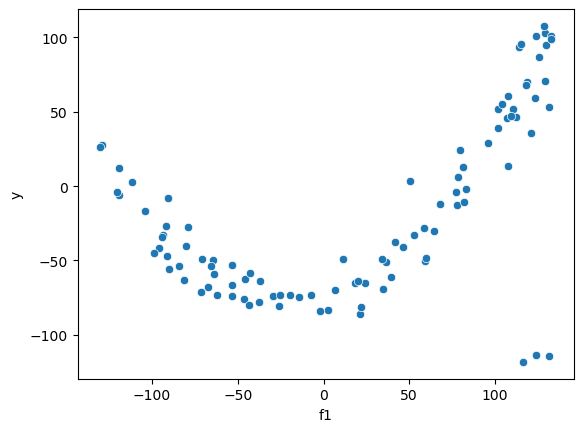

In [4]:
sns.scatterplot(data=df, x='f1', y='y')

### Model Training

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['f1']], df['y'])

LinearRegression()

In [6]:
print(reg.coef_, reg.intercept_)

[0.38221563] -23.833734603860584


In [7]:
pred = reg.predict(df[['f1']])

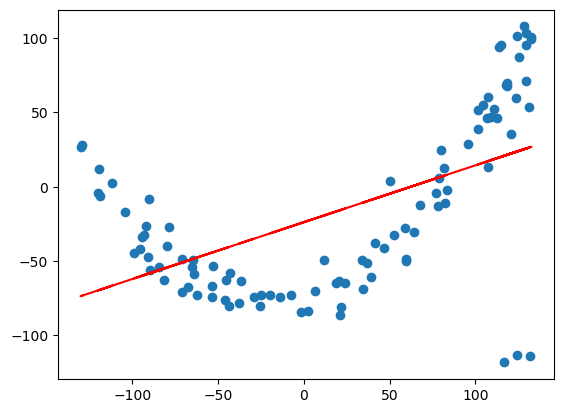

In [8]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred, 'r')

plt.show()

- In the above scenario of underfitting if we try to use hyperparameter tuning then it will be of no use as only the position of the model will change not the shape.
- So until and unless the shape changes the model will never be able to capture the pattern in the data.
- In order to do so using Linear regression we will have to use Feature Engineering

### Feature Engineering - Learning Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(df[['f1']])
X_poly

array([[ 1.00000000e+00, -1.29366669e+02,  1.67357350e+04],
       [ 1.00000000e+00, -1.30282541e+02,  1.69735404e+04],
       [ 1.00000000e+00, -1.19366669e+02,  1.42484016e+04],
       [ 1.00000000e+00, -1.11659139e+02,  1.24677633e+04],
       [ 1.00000000e+00, -1.18996509e+02,  1.41601691e+04],
       [ 1.00000000e+00, -1.20273299e+02,  1.44656664e+04],
       [ 1.00000000e+00, -1.04366669e+02,  1.08924015e+04],
       [ 1.00000000e+00, -9.34961665e+01,  8.74153316e+03],
       [ 1.00000000e+00, -9.05775318e+01,  8.20428927e+03],
       [ 1.00000000e+00, -9.21268759e+01,  8.48736126e+03],
       [ 1.00000000e+00, -9.43666687e+01,  8.90506816e+03],
       [ 1.00000000e+00, -7.99587739e+01,  6.39340553e+03],
       [ 1.00000000e+00, -7.87313467e+01,  6.19862495e+03],
       [ 1.00000000e+00, -9.57363624e+01,  9.16545108e+03],
       [ 1.00000000e+00, -8.43666687e+01,  7.11773479e+03],
       [ 1.00000000e+00, -6.47206705e+01,  4.18876519e+03],
       [ 1.00000000e+00, -9.10728836e+01

In [10]:
transformed_df = pd.DataFrame(X_poly, columns=['f1_0', 'f1_1', 'f1_2'])

transformed_df['y'] = df['y']

transformed_df.head()

,f1_0,f1_1,f1_2,y
0,1.0,-129.366669,16735.734971,28.000000
1,1.0,-130.282541,16973.540359,26.380447
2,1.0,-119.366669,14248.401597,12.000000
3,1.0,-111.659139,12467.763278,2.767886
4,1.0,-118.996509,14160.169083,-6.008839


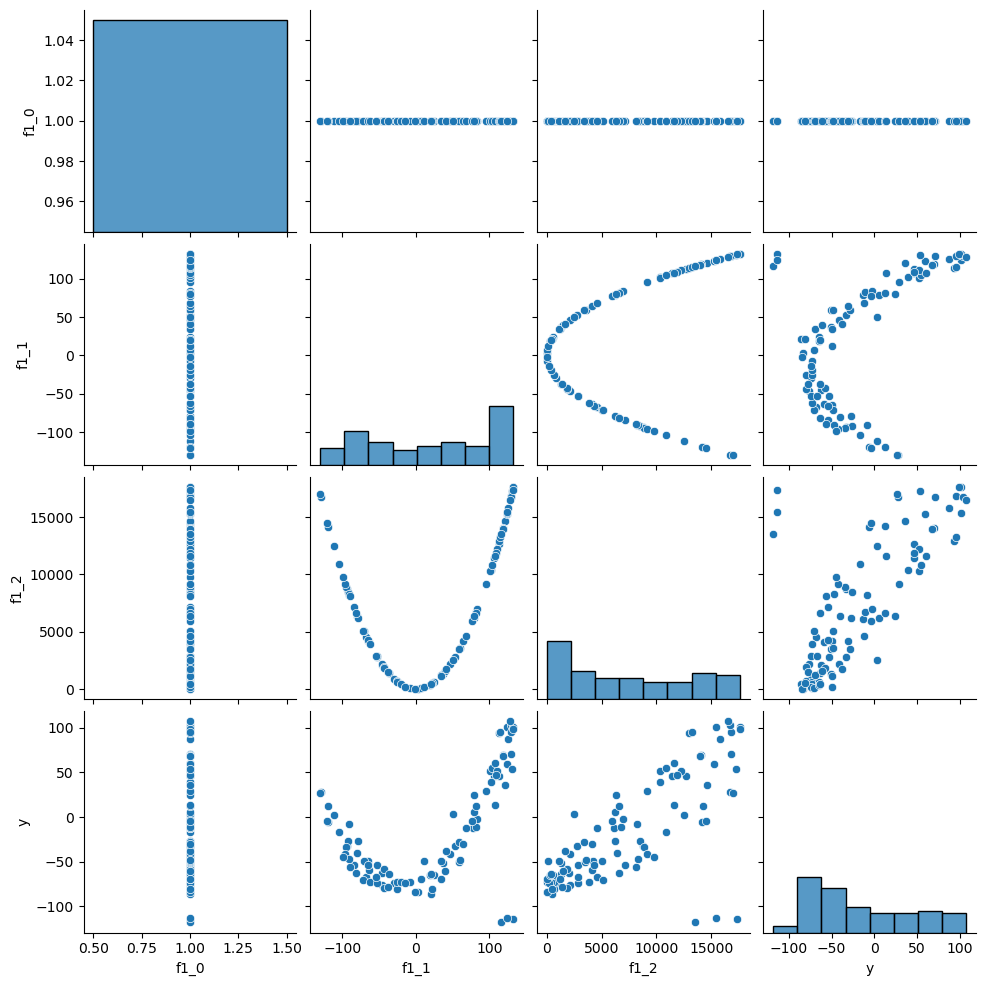

In [11]:
sns.pairplot(transformed_df)

In [12]:
reg_poly = LinearRegression()
reg_poly.fit(transformed_df[['f1_0', 'f1_1', 'f1_2']], transformed_df['y'])

LinearRegression()

In [13]:
print(reg_poly.coef_, reg_poly.intercept_)

[0.         0.22685864 0.00653552] -69.57700953233314


In [15]:
pred_poly = reg_poly.predict(transformed_df[['f1_0', 'f1_1', 'f1_2']])

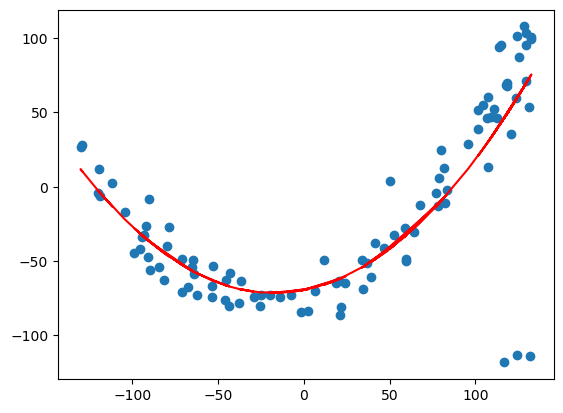

In [16]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred_poly, 'r')

plt.show()

### Other Regression Models - Lasso, Ridge, ElasticNet

In [50]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [51]:
reg_lasso = Lasso(alpha=1.0)
reg_lasso.fit(transformed_df[['f1_0', 'f1_1', 'f1_2']], transformed_df['y'])

Lasso()

In [53]:
pred_lasso = reg_lasso.predict(transformed_df[['f1_0', 'f1_1', 'f1_2']])

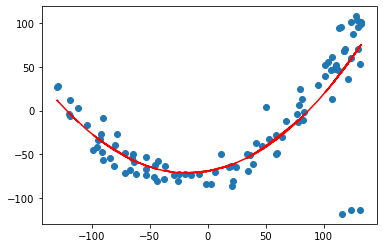

In [54]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred_lasso, 'r')

plt.show()

In [55]:
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(transformed_df[['f1_0', 'f1_1', 'f1_2']], transformed_df['y'])

Ridge()

In [56]:
pred_ridge = reg_ridge.predict(transformed_df[['f1_0', 'f1_1', 'f1_2']])

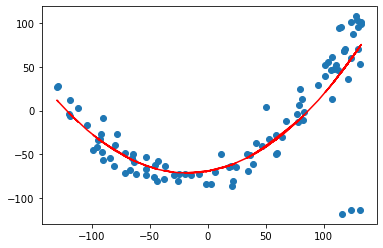

In [57]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred_ridge, 'r')

plt.show()

In [58]:
reg_elastic = ElasticNet(alpha=1.0)
reg_elastic.fit(transformed_df[['f1_0', 'f1_1', 'f1_2']], transformed_df['y'])

ElasticNet()

In [59]:
pred_elastic = reg_elastic.predict(transformed_df[['f1_0', 'f1_1', 'f1_2']])

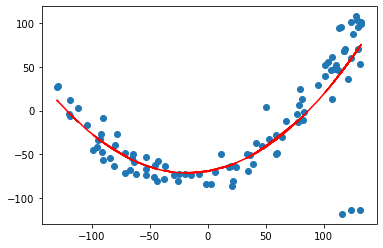

In [60]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred_elastic, 'r')

plt.show()